<a href="https://colab.research.google.com/github/boomcud49/python-random-quote/blob/master/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จุดประสงค์ของการวิเคราะห์ข้อมูล


1.   เกมที่ของส่วนแบ่งตลาดของ Video games มากที่สุด
2.   ทำนายยอดขายในแต่ละภูมิภาคจากค่ายและชื่อเกม
3.   เกมขวัญใจมหาชนของแต่ละภูมิภาค
4.   ชื่อเกมที่ทำยอดขายสูงสุด



In [1]:
import pandas as pd

In [2]:
vg_sales = pd.read_csv('vgsales.csv')

In [3]:
vg_sales.dtypes , vg_sales.shape

(Rank              int64
 Name             object
 Platform         object
 Year            float64
 Genre            object
 Publisher        object
 NA_Sales        float64
 EU_Sales        float64
 JP_Sales        float64
 Other_Sales     float64
 Global_Sales    float64
 dtype: object, (16598, 11))

In [4]:
vg_sales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
vg_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


คำถามเพื่อทำการวิเคราะห์

1.   ตั้งคำถาม

*   Trend ของเกมตลอด 40 ปี
*   อยากรู้ว่ายอดขายสูงสุดต่อเนื่องเป็นของเกมอะไร
*   อยากรู้ว่าเกมไหนทำยอดขายสูงสุดในแต่ละภูมิภาค
*   แต่ละแพลตฟอร์มฮิตสุดในช่วงปีไหน
*   เกมแนวไหนที่ฮิตที่สูงในแต่ละภูมิภาค
*   ค่ายเกมไหนครองในแต่ภูมิภาคตลาด

2.  ตั้งสมมติฐาน
*   คนยุโรปน่าชอบเกมแนวกีฬา
*   ตลาดเกมในอเมริกาน่าจะใหญ่ที่สุด

3.  เป้าหมาย
*   สามารถหายอดขายจากชื่อเกม / แนวเกม / แพลตฟอร์ม ในตลาดภูมิภาคต่างๆได้




In [31]:
vg_sales.groupby('Year').sum()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,29826,10.59,0.67,0.00,0.12,11.38
1981.0,190488,33.40,1.96,0.00,0.32,35.77
1982.0,149186,26.92,1.65,0.00,0.31,28.86
1983.0,56759,7.76,0.80,8.10,0.14,16.79
1984.0,22911,33.28,2.10,14.27,0.70,50.36
1985.0,55505,33.73,4.74,14.56,0.92,53.94
1986.0,35986,12.50,2.84,19.81,1.93,37.07
1987.0,54701,8.46,1.41,11.63,0.20,21.74
1988.0,37181,23.87,6.59,15.76,0.99,47.22


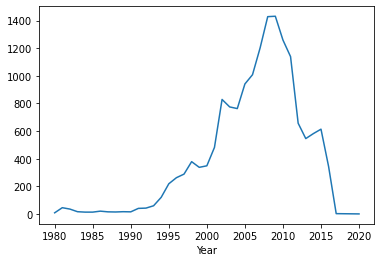

In [48]:
vg_sales.groupby('Year').Rank.count().plot()

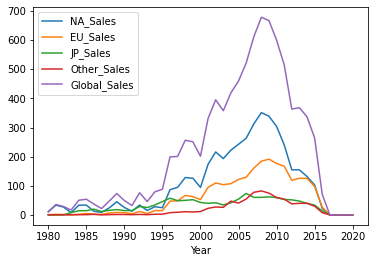

In [54]:
region_all = []
for region in ["NA","EU","JP","Other","Global"]:
  region_all.append("_".join([region,"Sales"]))
vg_sales.groupby('Year').sum().plot(y=region_all)

สรุป Trend ของเกมตั้งแต่ปี 1980 - 2020


*   เกมเริ่มแพร่หลายในช่วงยุค 90 และ Golden period ของเกมคือยุค 2010 จากนั้นเกมเริ่มน้อยลง
*   สมมติฐานอาจเกิดจากช่วง 2010 เกมมือถือ/PC (App/Playstore/Stream) เริ่มแพร่หลายคนเริ่มเล่น Video Games น้อยลง



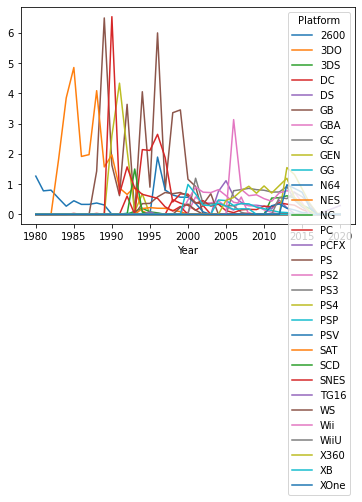

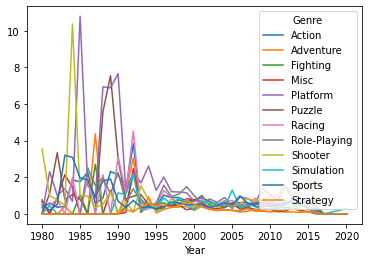

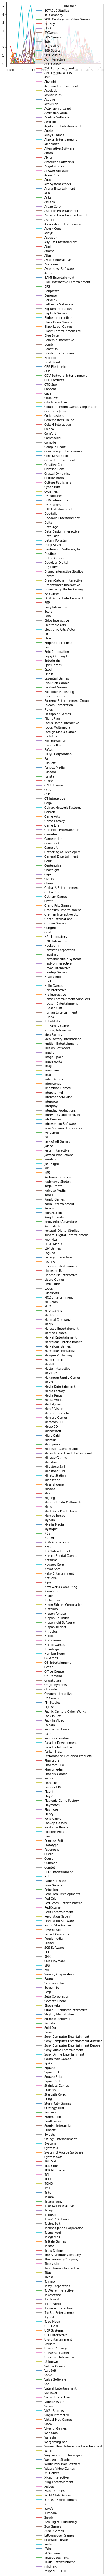

In [74]:
for x_col in ['Platform','Genre','Publisher']:
  vg_sales.pivot_table(index='Year',columns=x_col,values='Global_Sales').fillna(0).plot()

In [78]:
vg_sales.pivot_table(index='Publisher',columns='Genre',values='Name',aggfunc='count').fillna(0)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
10TACLE Studios,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1C Company,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
20th Century Fox Video Games,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2D Boy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3DO,17.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
imageepoch Inc.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
inXile Entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
vg_sales['Name'].value_counts()

Need for Speed: Most Wanted    12
FIFA 14                         9
Madden NFL 07                   9
Ratatouille                     9
LEGO Marvel Super Heroes        9
                               ..
Super Dodge Ball                1
San Goku Shi Taisen Ten         1
F-Zero                          1
Amped 3                         1
Starcraft 64                    1
Name: Name, Length: 11493, dtype: int64

In [ ]:
vg_sales['']

In [16]:
vg_sales['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

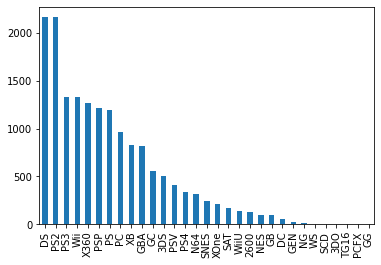

In [17]:
vg_sales['Platform'].value_counts().plot.bar()

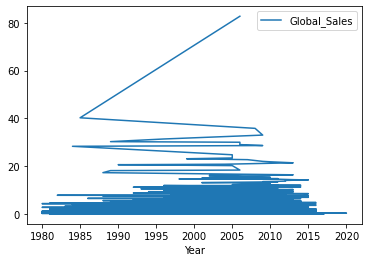

In [24]:
vg_sales.plot(x="Year",y="Global_Sales")